In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings(action="ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/날씨 빅데이터 공모전/data/gangwon_final.csv")
df = df.drop("Unnamed: 0", axis = 1)
df

,tm,district_1,district_2,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min
0,2018-01-01,강원특별자치도,철원군,95,2.1,-13.1,15.2,0.0,3.3,6.6,0.9,0.1,84.6,58.9,26.8
1,2018-01-02,강원특별자치도,철원군,95,1.8,-11.6,13.4,0.0,4.5,9.3,1.2,0.2,85.5,53.6,19.0
2,2018-01-03,강원특별자치도,철원군,95,-1.5,-14.1,12.6,0.0,2.8,5.8,0.8,0.0,81.2,59.2,32.4
3,2018-01-04,강원특별자치도,철원군,95,-1.8,-14.8,13.0,0.0,1.8,3.4,0.4,0.0,83.6,65.3,38.8
4,2018-01-05,강원특별자치도,철원군,95,0.2,-11.6,11.8,0.0,3.4,6.2,0.8,0.0,84.7,67.0,38.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39427,2020-10-18,강원특별자치도,영월군,121,19.1,3.6,15.5,0.0,2.4,4.7,0.7,0.0,97.9,76.2,36.5
39428,2020-10-19,강원특별자치도,영월군,121,21.3,5.1,16.2,0.0,2.2,3.5,0.5,0.0,97.9,73.5,24.6
39429,2020-10-20,강원특별자치도,영월군,121,21.8,4.9,16.9,0.0,1.9,3.1,0.4,0.0,97.9,73.7,31.2
39430,2020-10-21,강원특별자치도,영월군,121,14.8,5.7,9.1,0.0,2.2,3.4,0.3,0.0,97.1,86.3,66.9


In [ ]:
columns_to_average = ['ta_max', 'ta_min', 'ta_max_min', 'rn_day', 'ws_max', 'ws_ins_max', 'ws_mean', 'ws_min', 'hm_max', 'hm_mean', 'hm_min']

# Convert the 'tm' column to datetime format
df['tm'] = pd.to_datetime(df['tm'])

# Extract the month from the 'tm' column
df['month'] = df['tm'].dt.month

# Group by month and calculate the mean for each column
new_df_filtered = df.groupby('month')[columns_to_average].mean().reset_index()
new_df_filtered

,month,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min
0,1,3.736440,-7.353166,11.089606,0.849701,4.101016,7.541010,1.548417,0.346177,77.017789,57.229696,33.661202
1,2,6.406838,-5.126068,11.532906,0.787015,4.456443,8.135141,1.688856,0.346351,77.485141,55.271072,31.080966
2,3,13.535783,1.005496,12.530287,1.717385,4.703345,8.470191,1.757378,0.305944,83.564068,59.638829,34.062993
3,4,18.380926,5.504105,12.876821,2.335895,4.998179,9.044290,1.895401,0.332932,83.042006,57.279877,32.405278
4,5,23.436022,11.124821,12.311201,3.163023,4.539962,8.294628,1.705070,0.299000,87.741069,64.356063,40.014755
5,6,27.073582,16.758056,10.315526,4.714590,4.044273,7.256410,1.508583,0.251744,91.143039,72.844751,51.521783
6,7,29.433164,20.998118,8.435046,7.137377,3.650045,6.494921,1.338781,0.213564,93.996056,80.683777,61.972543
7,8,29.530675,21.444355,8.086320,10.956810,3.716458,6.686918,1.327987,0.201852,94.263142,81.717891,63.405735
8,9,25.197901,15.809105,9.388796,6.191767,3.671204,6.537253,1.374907,0.236019,94.451944,79.961296,57.370679
9,10,19.270759,8.083094,11.187634,3.510860,3.704271,6.619086,1.344896,0.260237,92.000777,74.385155,46.918668


# __K 값 결정__

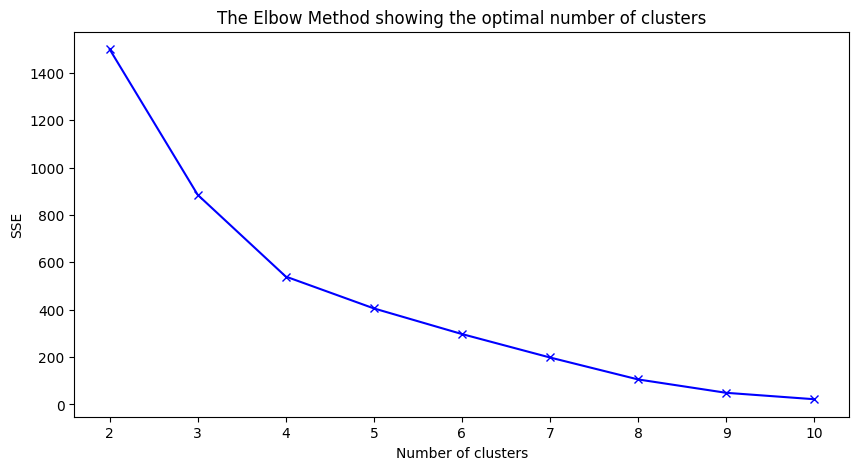

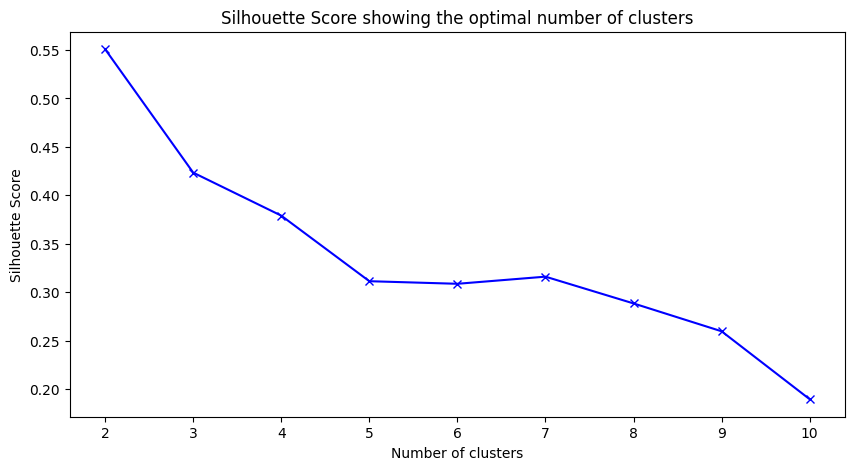

In [ ]:
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(new_df_filtered)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(new_df_filtered, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

# Plot the Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score showing the optimal number of clusters')
plt.show()

In [ ]:
silhouette_scores

[0.550847125454696,
 0.4234363475687611,
 0.379023385817707,
 0.3113449793722524,
 0.30867796757484656,
 0.3160339159352703,
 0.28840316611904127,
 0.2596354497455456,
 0.18950426133120937]

In [ ]:
# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42)
new_df_filtered['cluster'] = kmeans.fit_predict(features)

# PCA로 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = new_df_filtered['cluster']


# 클러스터 결과를 포함한 new_df_filtered 표시
new_df_filtered

,month,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min,cluster
0,1,3.736440,-7.353166,11.089606,0.849701,4.101016,7.541010,1.548417,0.346177,77.017789,57.229696,33.661202,3
1,2,6.406838,-5.126068,11.532906,0.787015,4.456443,8.135141,1.688856,0.346351,77.485141,55.271072,31.080966,3
2,3,13.535783,1.005496,12.530287,1.717385,4.703345,8.470191,1.757378,0.305944,83.564068,59.638829,34.062993,1
3,4,18.380926,5.504105,12.876821,2.335895,4.998179,9.044290,1.895401,0.332932,83.042006,57.279877,32.405278,1
4,5,23.436022,11.124821,12.311201,3.163023,4.539962,8.294628,1.705070,0.299000,87.741069,64.356063,40.014755,2
5,6,27.073582,16.758056,10.315526,4.714590,4.044273,7.256410,1.508583,0.251744,91.143039,72.844751,51.521783,2
6,7,29.433164,20.998118,8.435046,7.137377,3.650045,6.494921,1.338781,0.213564,93.996056,80.683777,61.972543,0
7,8,29.530675,21.444355,8.086320,10.956810,3.716458,6.686918,1.327987,0.201852,94.263142,81.717891,63.405735,0
8,9,25.197901,15.809105,9.388796,6.191767,3.671204,6.537253,1.374907,0.236019,94.451944,79.961296,57.370679,0
9,10,19.270759,8.083094,11.187634,3.510860,3.704271,6.619086,1.344896,0.260237,92.000777,74.385155,46.918668,2


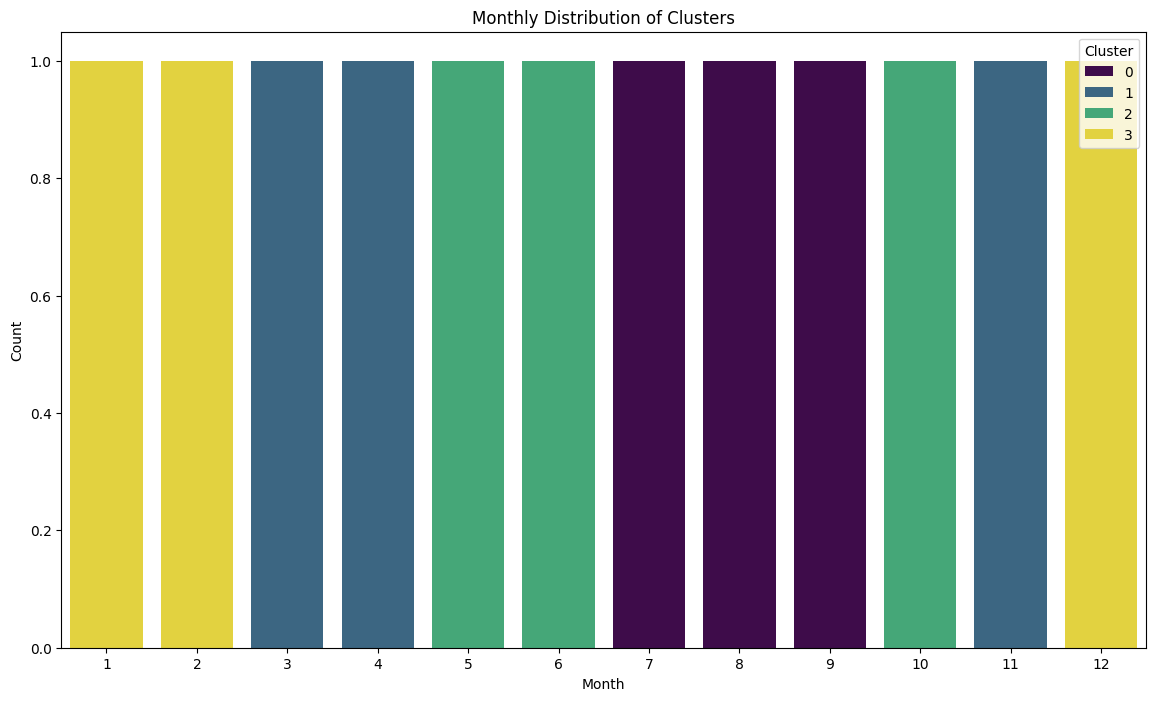

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = new_df_filtered[['ta_max', 'ta_min', 'ta_max_min', 'rn_day', 'ws_max', 'ws_ins_max', 'ws_mean', 'ws_min', 'hm_max', 'hm_mean', 'hm_min']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
new_df_filtered['cluster'] = kmeans.fit_predict(features)


# Create a count plot to show the distribution of months for each cluster
plt.figure(figsize=(14, 8))
sns.countplot(data=new_df_filtered, x='month', hue='cluster', palette='viridis')

# Set the title and labels
plt.title('Monthly Distribution of Clusters')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Cluster')

# Show the plot
plt.show()

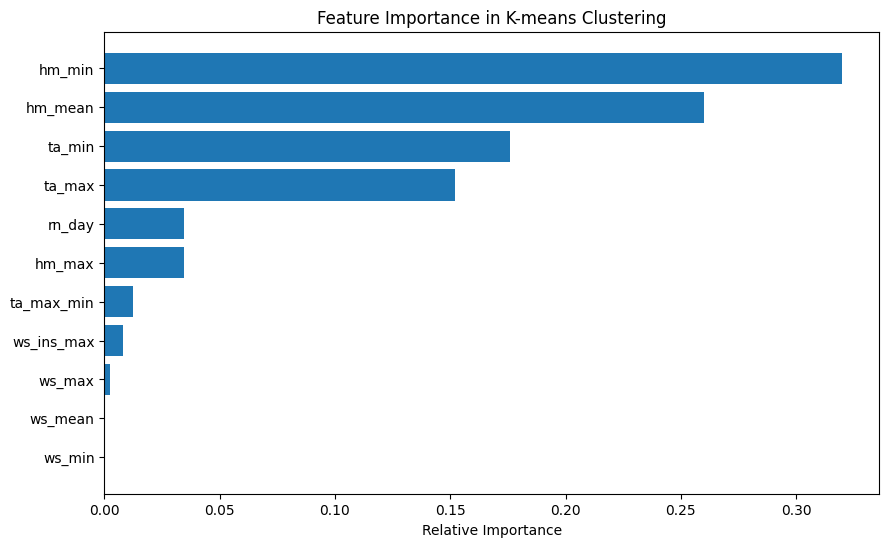

In [ ]:
import numpy as np

features = ['ta_max', 'ta_min', 'ta_max_min', 'rn_day', 'ws_max', 'ws_ins_max', 'ws_mean', 'ws_min', 'hm_max', 'hm_mean', 'hm_min']
new_df_filtered['cluster'] = kmeans.fit_predict(new_df_filtered[features])
# Calculate the importance of each feature
centroids = kmeans.cluster_centers_
cluster_labels = new_df_filtered['cluster']

# Calculate the average squared distance of each feature from the centroid
feature_importance = np.zeros(len(features))
for i in range(len(features)):
    distances = []
    for j in range(len(centroids)):
        cluster_data = new_df_filtered[new_df_filtered['cluster'] == j]
        distances.append(np.mean((cluster_data[features[i]] - centroids[j][i]) ** 2))
    feature_importance[i] = np.mean(distances)

# Normalize the importance
feature_importance = feature_importance / np.sum(feature_importance)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Plotting the feature importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Relative Importance')
plt.title('Feature Importance in K-means Clustering')
plt.gca().invert_yaxis()
plt.show()

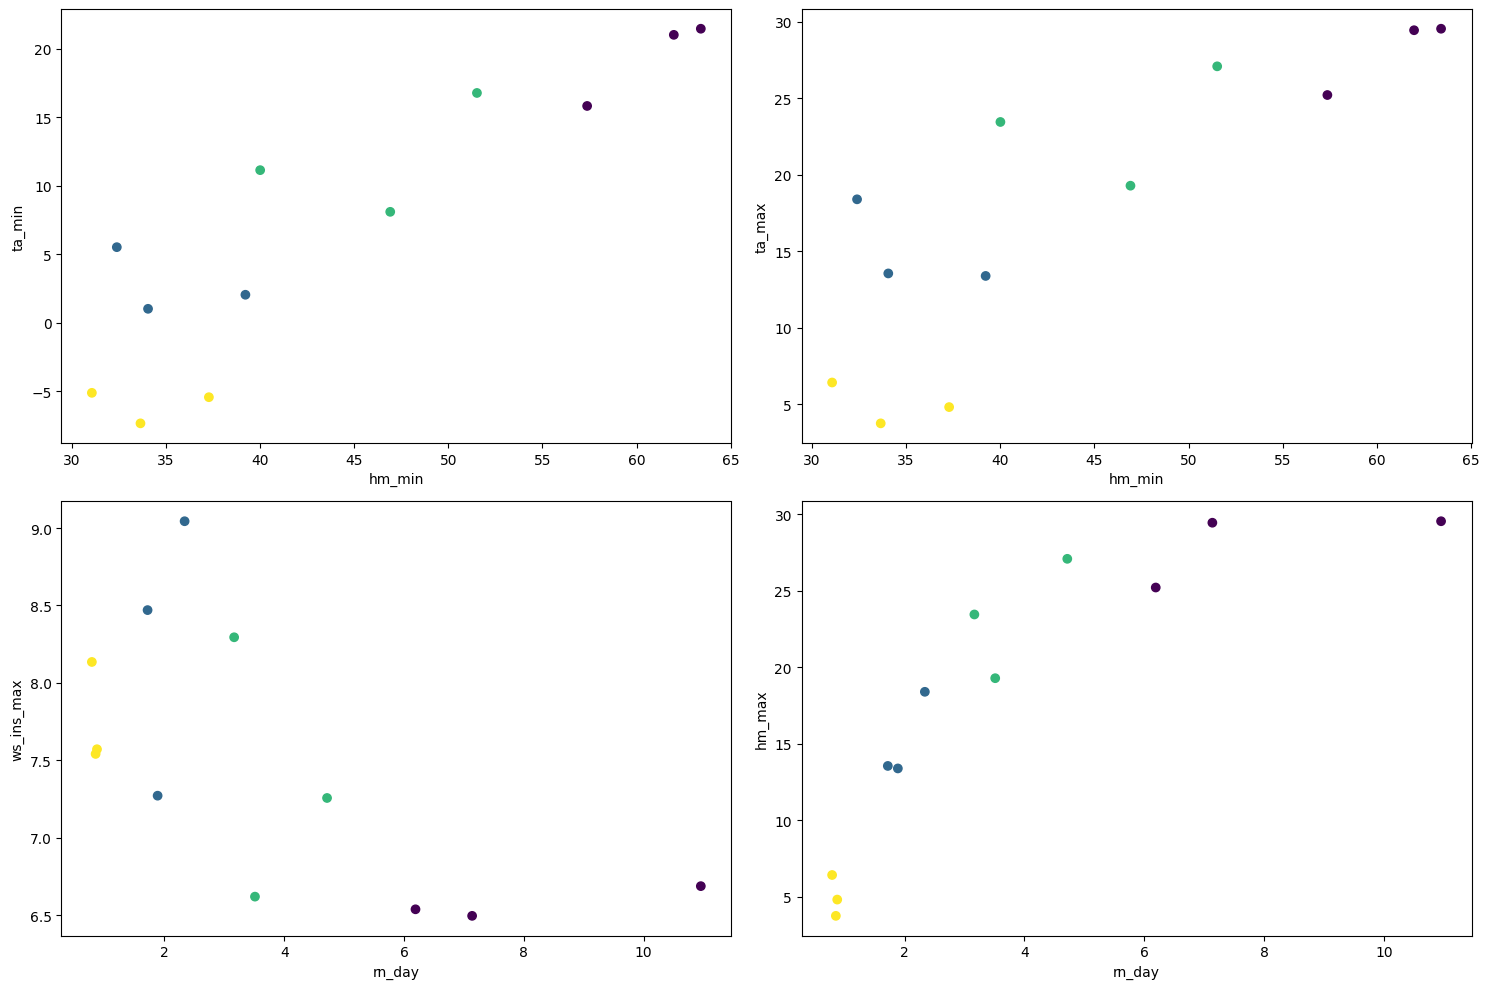

In [ ]:
# Plotting the results for each feature combination
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(new_df_filtered['hm_min'], new_df_filtered['ta_min'], c=new_df_filtered['cluster'])
plt.xlabel('hm_min')
plt.ylabel('ta_min')

plt.subplot(2, 2, 2)
plt.scatter(new_df_filtered['hm_min'], new_df_filtered['ta_max'], c=new_df_filtered['cluster'])
plt.xlabel('hm_min')
plt.ylabel('ta_max')

plt.subplot(2, 2, 3)
plt.scatter(new_df_filtered['rn_day'], new_df_filtered['ws_ins_max'], c=new_df_filtered['cluster'])
plt.xlabel('rn_day')
plt.ylabel('ws_ins_max')

plt.subplot(2, 2, 4)
plt.scatter(new_df_filtered['rn_day'], new_df_filtered['ta_max'], c=new_df_filtered['cluster'])
plt.xlabel('rn_day')
plt.ylabel('hm_max')

plt.subp

plt.tight_layout()
plt.show()